In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('Airlines+Data.csv')
df=pd.DataFrame(data)
df

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


<AxesSubplot:>

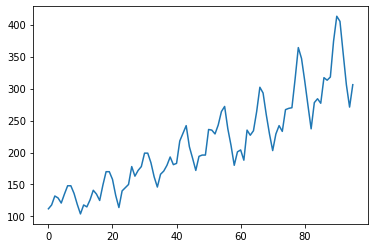

In [4]:
df.Passengers.plot()

In [5]:
df["Date"] = pd.to_datetime(df.Month,format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction

<AxesSubplot:xlabel='month', ylabel='year'>

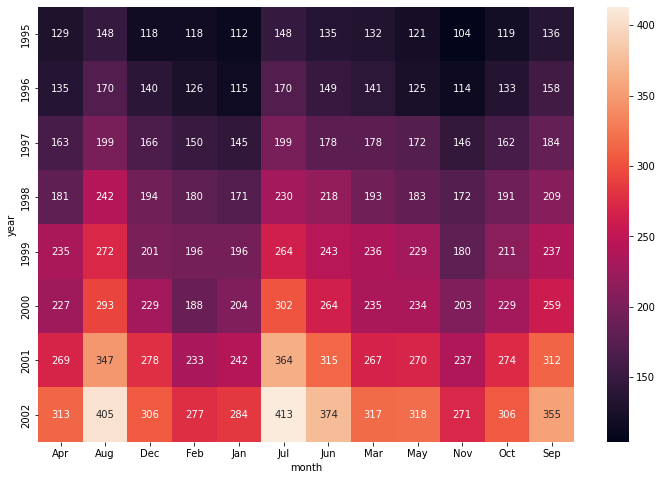

In [6]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


### In the above heat map jul-2002 and aug-2002 shows most number of Passengers

<AxesSubplot:xlabel='year', ylabel='Passengers'>

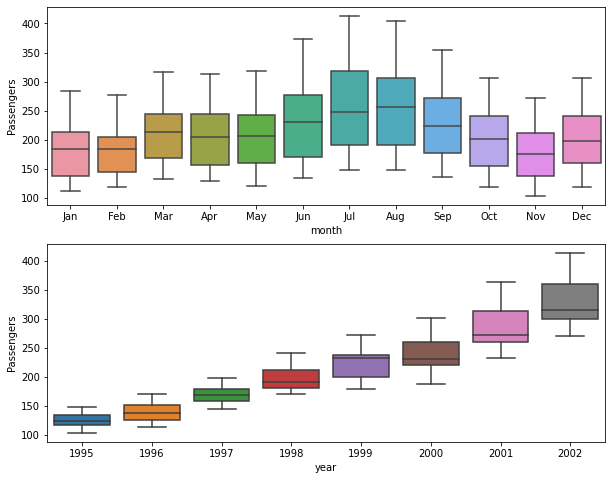

In [7]:
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df)

In [8]:
months=['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
n=df['Month'][0]
n[0:3]

'Jan'

In [9]:
df['months']=0
df['months']

0     0
1     0
2     0
3     0
4     0
     ..
91    0
92    0
93    0
94    0
95    0
Name: months, Length: 96, dtype: int64

In [10]:
for i in range(96):
    n=df['Month'][i]
    df['months'][i]=n[0:3]
df['months']

c:\users\damanjeet kaur.laptop-b5chj9sc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\damanjeet kaur.laptop-b5chj9sc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0     Jan
1     Feb
2     Mar
3     Apr
4     May
     ... 
91    Aug
92    Sep
93    Oct
94    Nov
95    Dec
Name: months, Length: 96, dtype: object

In [11]:
dum=pd.get_dummies(df['Month'])
dum

,Apr-00,Apr-01,Apr-02,Apr-95,Apr-96,Apr-97,Apr-98,Apr-99,Aug-00,Aug-01,...,Oct-98,Oct-99,Sep-00,Sep-01,Sep-02,Sep-95,Sep-96,Sep-97,Sep-98,Sep-99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data_df=pd.DataFrame(dum)
data3=pd.concat((df,dum),axis=1)
data3

,Month,Passengers,Date,month,year,months,Apr-00,Apr-01,Apr-02,Apr-95,...,Oct-98,Oct-99,Sep-00,Sep-01,Sep-02,Sep-95,Sep-96,Sep-97,Sep-98,Sep-99
0,Jan-95,112,1995-01-01,Jan,1995,Jan,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Feb-95,118,1995-02-01,Feb,1995,Feb,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mar-95,132,1995-03-01,Mar,1995,Mar,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Apr-95,129,1995-04-01,Apr,1995,Apr,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,May-95,121,1995-05-01,May,1995,May,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,2002-08-01,Aug,2002,Aug,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,Sep-02,355,2002-09-01,Sep,2002,Sep,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
93,Oct-02,306,2002-10-01,Oct,2002,Oct,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,Nov-02,271,2002-11-01,Nov,2002,Nov,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
log_pas=np.log(data3['Passengers'])
data3['log_pas']=log_pas
data3

,Month,Passengers,Date,month,year,months,Apr-00,Apr-01,Apr-02,Apr-95,...,Oct-99,Sep-00,Sep-01,Sep-02,Sep-95,Sep-96,Sep-97,Sep-98,Sep-99,log_pas
0,Jan-95,112,1995-01-01,Jan,1995,Jan,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.718499
1,Feb-95,118,1995-02-01,Feb,1995,Feb,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.770685
2,Mar-95,132,1995-03-01,Mar,1995,Mar,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.882802
3,Apr-95,129,1995-04-01,Apr,1995,Apr,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.859812
4,May-95,121,1995-05-01,May,1995,May,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,2002-08-01,Aug,2002,Aug,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.003887
92,Sep-02,355,2002-09-01,Sep,2002,Sep,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5.872118
93,Oct-02,306,2002-10-01,Oct,2002,Oct,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.723585
94,Nov-02,271,2002-11-01,Nov,2002,Nov,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.602119


<AxesSubplot:xlabel='year', ylabel='Passengers'>

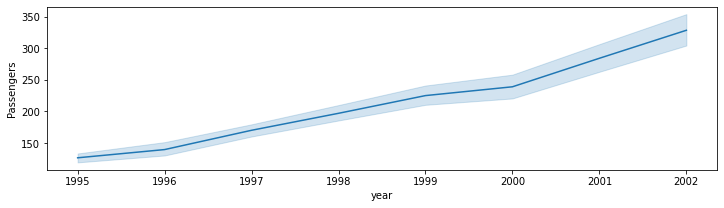

In [14]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=data3)

In [15]:
t=np.arange(1,97)
data3['t']=t
data3['t_squared']=data3['t']*data3['t']
data3

,Month,Passengers,Date,month,year,months,Apr-00,Apr-01,Apr-02,Apr-95,...,Sep-01,Sep-02,Sep-95,Sep-96,Sep-97,Sep-98,Sep-99,log_pas,t,t_squared
0,Jan-95,112,1995-01-01,Jan,1995,Jan,0,0,0,0,...,0,0,0,0,0,0,0,4.718499,1,1
1,Feb-95,118,1995-02-01,Feb,1995,Feb,0,0,0,0,...,0,0,0,0,0,0,0,4.770685,2,4
2,Mar-95,132,1995-03-01,Mar,1995,Mar,0,0,0,0,...,0,0,0,0,0,0,0,4.882802,3,9
3,Apr-95,129,1995-04-01,Apr,1995,Apr,0,0,0,1,...,0,0,0,0,0,0,0,4.859812,4,16
4,May-95,121,1995-05-01,May,1995,May,0,0,0,0,...,0,0,0,0,0,0,0,4.795791,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,2002-08-01,Aug,2002,Aug,0,0,0,0,...,0,0,0,0,0,0,0,6.003887,92,8464
92,Sep-02,355,2002-09-01,Sep,2002,Sep,0,0,0,0,...,0,1,0,0,0,0,0,5.872118,93,8649
93,Oct-02,306,2002-10-01,Oct,2002,Oct,0,0,0,0,...,0,0,0,0,0,0,0,5.723585,94,8836
94,Nov-02,271,2002-11-01,Nov,2002,Nov,0,0,0,0,...,0,0,0,0,0,0,0,5.602119,95,9025


## Spliting Data into train and test

In [16]:
Train =data3.head(84)
Test = data3.tail(12)

In [17]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2)) #rmse
rmse_linear

53.19923653480271

In [18]:
#Exponential

Exp = smf.ols('log_pas~t',data=Train).fit() #log 
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


46.05736110315635

In [19]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.05188897933164

In [20]:
#Additive seasonality 

add_sea = smf.ols('Passengers~month',data=Train).fit() #y var with dummy vars
pred_add_sea = pd.Series(add_sea.predict(Test[['month']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421814

In [21]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_squared+months',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['months','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612082624

In [22]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_pas~months',data = Train).fit() #log of dummy
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708612

In [23]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_pas~t+months',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

10.519172544323526

In [24]:
#Compare the results 

data4 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data4)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.519173
4,rmse_add_sea_quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,140.063202


### from the above results Multiplicative additive seasonality model gives less rmse value. hence, it is the best model